In [1]:
import pandas as pd
import numpy as np
import time

import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
results = pd.read_csv('data/olympic_marathon_results.csv')
temp = pd.read_csv('olympics_temperature.csv')

In [3]:
results.columns

Index(['Unnamed: 0', 'year', 'gender', 'rank', 'country_code', 'name', 'time',
       'notes', 'country_x', 'ISO_x', 'Latitude (average)_x',
       'Longitude (average)_x', 'country_y', 'ISO_y', 'Latitude (average)_y',
       'Longitude (average)_y', 'country', 'ISO', 'Latitude (average)',
       'Longitude (average)'],
      dtype='object')

In [4]:
for i in range(len(results)):
    if results.loc[i, 'time'] != 'None':
        results.loc[i, 'time_record'] = datetime.datetime.strptime(results.loc[i, 'time'], '%H:%M:%S.%f')

In [5]:
res_men = results[results['gender']=='men']
res_women = results[results['gender']=='women']

In [6]:
olympics = list(set(results['year']))
gold_records = []
top10_records = []
bottom10_records = []
avg_time = []
std_time = []
nfin = []
nstrt = []
disqf = []
cmplt = []

for oly in olympics:
    df = res_men[res_men['year']==oly].reset_index()
    
    gold_rec = df[df['rank']=='G']['time_record'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df.iloc[:10]['time_record'].mean().time()
    top10_records.append(top10_rec)
    
    bottom10_rec = df.iloc[:-10]['time_record'].mean().time()
    bottom10_records.append(bottom10_rec)
    
    not_finish = 0
    not_start = 0
    disqualified = 0
    completed = 0
    
    avg_time.append(df['time_record'].mean().time())
    std_time.append(df['time_record'].std())
    
    for i in range(len(df)):
        if df.loc[i, 'notes'] == 'Did not finish':
            not_finish += 1
        elif df.loc[i, 'notes'] == 'Did not start':
            not_start += 1
        elif df.loc[i, 'notes'] == 'Disqualified':
            disqualified += 1
        else:
            completed += 1
            
    nfin.append(not_finish)
    nstrt.append(not_start)
    disqf.append(disqualified)
    cmplt.append(completed)

In [7]:
oly_men_records = pd.DataFrame({'year' : list(olympics), 'avg_time': avg_time, 'gold_records':gold_records, 
                                'top10_records':top10_records, 'bottom10_records': bottom10_records,
                                'std_time':std_time, 'ncompleted': cmplt, 'nfinished' : nfin,
                                'nstarted': nstrt, 'disqualified': disqf})

In [20]:
oly_men_records['gender']='men'

In [131]:
oly_men_records.to_csv('oly_men_records.csv')

In [8]:
olympics = list(set(res_women['year']))
gold_records = []
top10_records = []
bottom10_records = []
avg_time = []
std_time = []
nfin = []
nstrt = []
disqf = []
cmplt = []

for oly in olympics:
    df = res_women[res_women['year']==oly].reset_index()
    
    gold_rec = df[df['rank']=='G']['time_record'][0].time()
    gold_records.append(gold_rec)
    
    top10_rec = df.iloc[:10]['time_record'].mean().time()
    top10_records.append(top10_rec)
    
    bottom10_rec = df.iloc[:-10]['time_record'].mean().time()
    bottom10_records.append(bottom10_rec)
    
    not_finish = 0
    not_start = 0
    disqualified = 0
    completed = 0
    
    avg_time.append(df['time_record'].mean().time())
    std_time.append(df['time_record'].std())
    
    for i in range(len(df)):
        if df.loc[i, 'notes'] == 'Did not finish':
            not_finish += 1
        elif df.loc[i, 'notes'] == 'Did not start':
            not_start += 1
        elif df.loc[i, 'notes'] == 'Disqualified':
            disqualified += 1
        else:
            completed += 1
            
    nfin.append(not_finish)
    nstrt.append(not_start)
    disqf.append(disqualified)
    cmplt.append(completed)

In [9]:
oly_women_records = pd.DataFrame({'year' : list(olympics), 'avg_time': avg_time, 'gold_records':gold_records, 
                                'top10_records':top10_records, 'bottom10_records': bottom10_records,
                                'std_time':std_time, 'ncompleted': cmplt, 'nfinished' : nfin,
                                'nstarted': nstrt, 'disqualified': disqf})

In [19]:
oly_women_records['gender'] = 'women'

In [21]:
olympics = pd.concat([oly_men_records, oly_women_records])

In [3]:
oly_men_records = pd.read_csv('oly_men_records.csv')

In [22]:
olympics['city'] = [year[:-5] for year in olympics['year']]
olympics['year'] = [year[-4:] for year in olympics['year']]

In [23]:
temp = pd.read_csv('olympics_temperature.csv')

In [24]:
temp['omaht'] = [t[:2] for t in temp['omaht']]
temp['ommht'] = [t[:2] for t in temp['ommht']]
temp['ommt'] = [t[:2] for t in temp['ommt']]
temp['ommlt'] = [t[:2] for t in temp['ommlt']]
temp['omalt'] = [t[:2] for t in temp['omalt']]

In [25]:
olympics = olympics.astype({'year':'int64'})

In [26]:
df = pd.merge(olympics, temp, on='year', how='left')

In [28]:
df[['year', 'gender', 'ncompleted']].to_csv('olmpic_ncompleted.csv')

In [197]:
import seaborn as sns

In [198]:
import matplotlib.pyplot as plt

In [199]:
for i in range(len(df)):
    minute = df.loc[i, 'avg_time'].hour * 60 + df.loc[i, 'avg_time'].minute
    df.loc[i, 'avg_minute'] = minute

In [200]:
for i in range(len(df)):
    df.loc[i, 'std_seconds'] = df.loc[i, 'std_time'].seconds

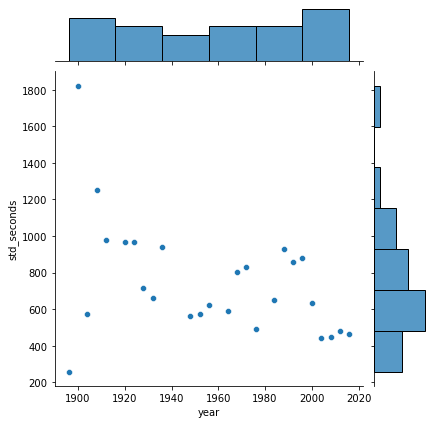

In [162]:
sns.jointplot(x="year", y="std_seconds", data=df)
plt.show()

In [201]:
df = df.astype({ 'omaht' : 'int', 'ommht':'int', 'ommt':'int', 'ommlt':'int', 'omalt':'int', })

In [202]:
del df['Unnamed: 0']

In [203]:
df['total_athletes'] = df['ncompleted'] + df['nfinished'] + df['nstarted'] + df['disqualified']

In [204]:
df['not_complete_rate'] = (df['nfinished'] + df['nstarted'] +df['disqualified']) / df['total_athletes']

In [184]:
for i in range(len(df)):
    sec = df.loc[i, 'gold_records'].hour * 60 *60 + df.loc[i, 'gold_records'].minute * 60 + df.loc[i, 'gold_records'].second
    df.loc[i, 'gold_records_re'] = sec
    
    sec_top10 = df.loc[i, 'top10_records'].hour * 60 *60 + df.loc[i, 'top10_records'].minute * 60 + df.loc[i, 'top10_records'].second
    df.loc[i, 'top10_records_re'] = sec_top10
    
    sec_bottom10 = df.loc[i, 'bottom10_records'].hour * 60 *60 + df.loc[i, 'bottom10_records'].minute * 60 + df.loc[i, 'bottom10_records'].second
    df.loc[i, 'bottom10_records'] = sec_to

In [185]:
df_re = df[['year', 'ommt',  'avg_minute', 'gold_records_re', 'top10_records_re', 'nfinished', 'std_seconds']]

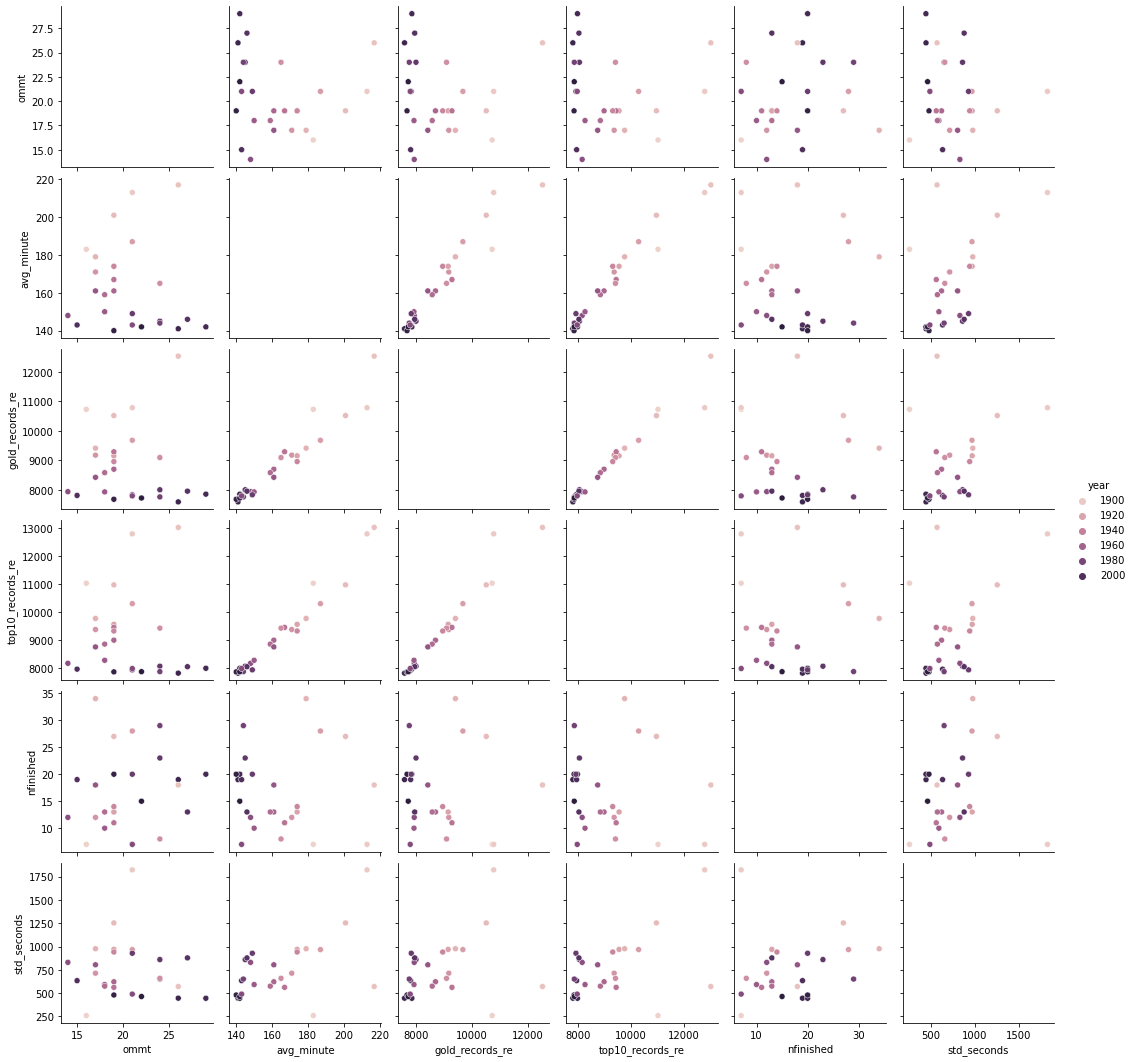

In [186]:
sns.pairplot(df_re, hue="year")
plt.show()

In [106]:
df_re = df[['year', 'omaht', 'avg_minute', 'nfinished', 'std_seconds']]

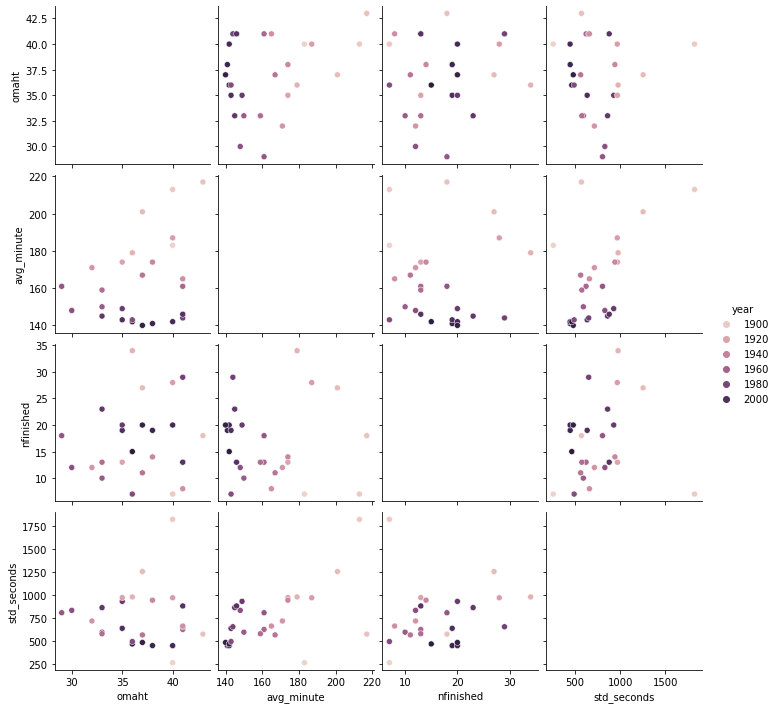

In [107]:
sns.pairplot(df_re, hue="year")
plt.show()

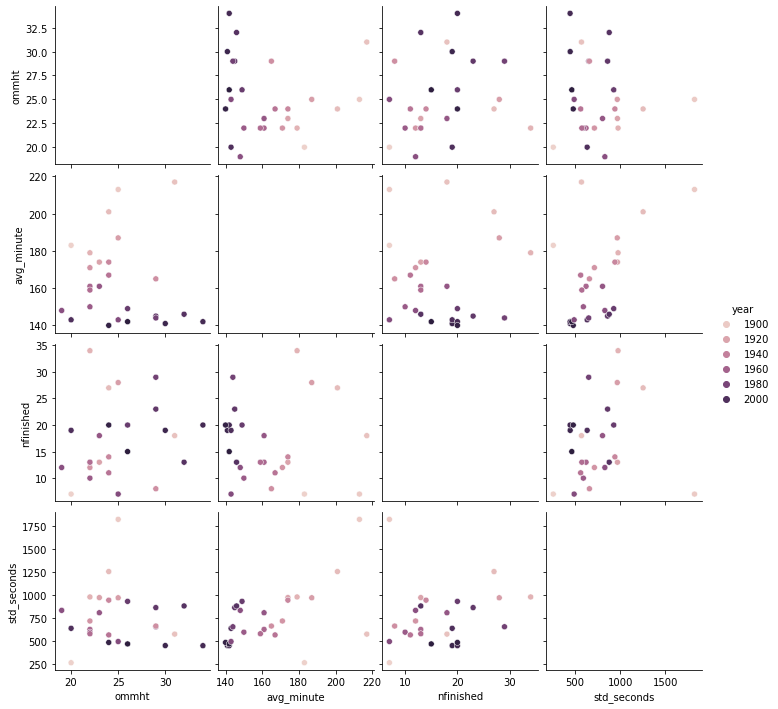

In [108]:
df_re = df[['year', 'ommht', 'avg_minute', 'nfinished', 'std_seconds']]

sns.pairplot(df_re, hue="year")
plt.show()

In [109]:
df.head(5)

,year,avg_time,std_time,ncompleted,nfinished,nstarted,disqualified,city_x,avg_time_re,city_y,country,omaht,ommht,ommt,ommlt,omalt,avg_minute,std_seconds,total_athletes,not_complete_rate
0,2008,1900-01-01 02:21:03.552631808,0 days 00:07:26.244219973,76,19,3,0,beijing,02:21:03.552631,Beijing,CHN,38,30,26,21,11,141.0,446.0,98,0.224490
1,1928,1900-01-01 02:51:48.877192960,0 days 00:11:54.497327551,57,12,10,0,amsterdam,02:51:48.877192,Amsterdam,NED,32,22,17,12,5,171.0,714.0,79,0.278481
2,1956,1900-01-01 02:41:42.181818112,0 days 00:10:22.829604233,33,13,2,0,melbourne,02:41:42.181818,Melbourne,AUS,41,22,19,11,3,161.0,622.0,48,0.312500
3,2000,1900-01-01 02:23:34.580247040,0 days 00:10:34.499662415,81,19,0,0,sydney,02:23:34.580247,Sydney,AUS,35,20,15,11,5,143.0,634.0,100,0.190000
4,2004,1900-01-01 02:22:21.888889088,0 days 00:07:25.287940550,81,20,1,0,athens,02:22:21.888889,Athina,GRE,40,34,29,24,10,142.0,445.0,102,0.205882


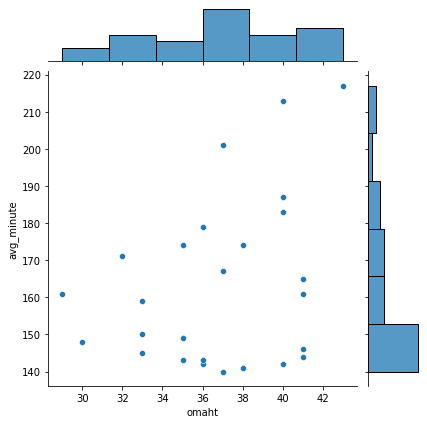

In [53]:
df_re = df[['year', 'ommht', 'avg_minute', 'nfinished', 'std_seconds']]

sns.pairplot(df_re, hue="year")
plt.show()